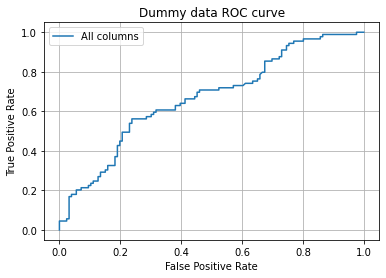

In [15]:
import pandas
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

data = pandas.read_csv('./train.csv', delimiter=(','))
data = data[pandas.isnull(data['Age']) == 0 ]
data = data[pandas.isnull(data['Fare']) == 0 ]
data = data[pandas.isnull(data['Parch']) == 0 ]

Y = data['Survived']
X = pandas.get_dummies(data.loc[:, ['Age', 'Fare', 'Parch']])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
logRegModel = LogisticRegression(max_iter=1000)
logRegModel.fit(X_train, Y_train)
#print('LogisticRegression Score: ', logRegModel.score(X_test,Y_test))

predictions = logRegModel.predict_proba(X_test)
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1] )
plt.plot( fpr, tpr, label = 'All columns' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dummy data ROC curve')
plt.legend(loc = 0)
plt.grid()
plt.show()


In [ ]:
Модель выше построена после удаления всех категориальных переменный. Модель показывает плохой результат по метрике ROC.

Percent will be deleted:  20.08978675645342


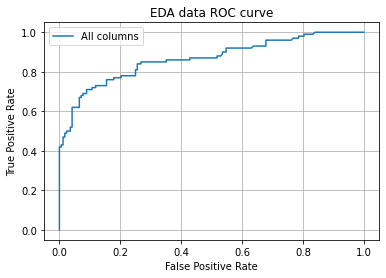

In [9]:
data = pandas.read_csv('./train.csv', delimiter=(','))
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Sex'])
transformedGender = pandas.Series(data = labelEncoder.transform(data['Sex']))
data['Sex'] = transformedGender

# Проверяем процент данных которые будут потеряны в случае удаления пустых значений
c_data = data
c_data = c_data[pandas.isnull(c_data['Age']) == 0]
c_data = c_data[pandas.isnull(c_data['Embarked']) == 0]
del_perc = 100 - c_data.shape[0] / (data.shape[0] / 100) 
print("Percent will be deleted: ", del_perc)

# Заполняем пропуски средним значением
ages = data['Age'][pandas.isnull(data['Age']) == 0]
mid_age = math.ceil(ages.sum() / ages.shape[0])
data['Age'][pandas.isnull(data['Age']) == 1] = mid_age

# Добавляем для пустых полей индикатор
data['Embarked_empty'] = 0
data['Embarked_empty'][pandas.isnull(data['Embarked']) == 1] = 1

# Отсекаем признаки логически не имеющие корелляционную зависимость к выживаемости, колличественные переменные,
# оставляем категориальные переменные которые могли влиять на этот показатель.
X = pandas.get_dummies(data.loc[:, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Embarked_empty']])

Y = data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
logRegModel = LogisticRegression(max_iter=1000)
logRegModel.fit(X_train, Y_train)
#print('LogisticRegression Score: ', logRegModel.score(X_test,Y_test))

predictions = logRegModel.predict_proba(X_test)
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1] )
plt.plot( fpr, tpr, label = 'All columns' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EDA data ROC curve')
plt.legend(loc = 0)
plt.grid()
plt.show()

Подсчет показал, что при удалении пустых значений данных станет меньше на 20%.
Это нас не устраивает, заполняем поле Age среднем значением, а поле Embarked заполняем индикационным методом.
Выбросов в данных найти не удалось. Это хорошо, нечего удалять.
Так мы сохранили 100% данных, обучаем модель. Модель показывает более лучший результат по сравнением с первым по метрике ROC.

Далее построим график выживаемости в зависимости от класса посадки.
Как видно на графике невыживших, что 3 класс посадки обладал низкой выжваемостью. 

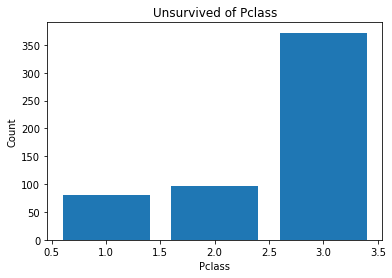

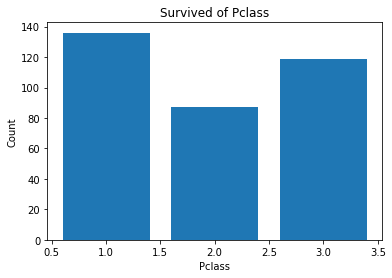

In [10]:
data = pandas.read_csv('./train.csv', delimiter=(','))
data = data[pandas.isnull(data['Pclass']) == 0 ]

unsurvived = data[data.Survived == 0]
unsurvived = unsurvived.reset_index()

hashmap = dict()
for index, row in unsurvived.iterrows():
    if hashmap.get(row['Pclass']) == None:
        hashmap[row['Pclass']]=1
    else:
        hashmap[row['Pclass']]=hashmap.get(row['Pclass'])+1

plt.bar(hashmap.keys(), hashmap.values())
plt.title("Unsurvived of Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

unsurvived = data[data.Survived == 1]
unsurvived = unsurvived.reset_index()

hashmap = dict()
for index, row in unsurvived.iterrows():
    if hashmap.get(row['Pclass']) == None:
        hashmap[row['Pclass']]=1
    else:
        hashmap[row['Pclass']]=hashmap.get(row['Pclass'])+1

plt.bar(hashmap.keys(), hashmap.values())
plt.title("Survived of Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

In [ ]:
Так же, преобразуем Age в бинарную переменную по признаку - больше\меньше 16 лет. Младше 16 обладает значением - 1.

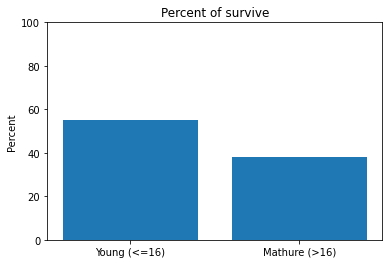

In [11]:
data = pandas.read_csv('./train.csv', delimiter=(','))
data = data[pandas.isnull(data['Age']) == 0 ]
data['Age'][data['Age']<=16]=1
data['Age'][data['Age']>16]=0

young = data[data['Age']==1]
math = data[data['Age']==0]

surv_young_coef = young[young.Survived == 1].shape[0] / (young.shape[0] / 100)
surv_math_coef = math[math.Survived == 1].shape[0] / (math.shape[0] / 100)

plt.bar(['Young (<=16)', 'Mathure (>16)'], [surv_young_coef, surv_math_coef])
plt.title("Percent of survive")
plt.ylabel("Percent")
plt.axis([None, None, 0, 100])
plt.show()


In [ ]:
Выживаемость по возрасту представлена на графике в процентах.